Import required libraries

In [116]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

/home/samrawit/anaconda3/envs/mltraining/lib/python3.11/site-packages/IPython/core/completerlib.py:149: UserWarning: using rootmodules_cache requires you to install the `pickleshare` library.
  ip.db['rootmodules_cache'] = rootmodules_cache


Read the csv files of the three locations

In [60]:
benin = pd.read_csv('./data/benin-malanville.csv', na_values=["NAN", "?", " "])
sierraleone = pd.read_csv('./data/sierraleone-bumbuna.csv', na_values=["NAN", "?", " "])
togo = pd.read_csv('./data/togo-dapaong_qc.csv', na_values= ["NAN", "?"," "])

Overview of the dataset for the three locations

In [61]:
benin.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [62]:
sierraleone.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [63]:
togo.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


Features of the dataset

In [64]:
benin.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [65]:
sierraleone.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [66]:
togo.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

Data type of the features for the datasets

In [67]:
benin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [68]:
sierraleone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [69]:
togo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

Checking for empty values

In [70]:
benin.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [71]:
sierraleone.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [72]:
togo.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Size of the datasets

In [73]:
benin.shape

(525600, 19)

In [74]:
sierraleone.shape

(525600, 19)

In [75]:
togo.shape

(525600, 19)

Data preprocessing

Comment values for the three dataset recors is empty, so no need to keep it in the data. We will remove it.

In [76]:
benin.drop(columns=["Comments"], inplace=True)


In [77]:
sierraleone.drop(columns=["Comments"], inplace=True)

In [78]:
togo.drop(columns=["Comments"], inplace=True)

Use appropriate datatypes

In [79]:
benin["Timestamp"] = pd.to_datetime(benin["Timestamp"])

In [80]:
sierraleone["Timestamp"] = pd.to_datetime(sierraleone["Timestamp"])

In [81]:
togo["Timestamp"] = pd.to_datetime(togo["Timestamp"])

Extract date, time, year, month and day from the datetime

In [82]:
benin["Date"] = benin["Timestamp"].dt.date

In [83]:
benin["Time"] = benin["Timestamp"].dt.time

In [84]:
benin["Year"] = benin["Timestamp"].dt.year

In [85]:
benin["Month"] = benin["Timestamp"].dt.month

In [86]:
benin["Day"] = benin["Timestamp"].dt.day

In [87]:
sierraleone["Date"] = sierraleone["Timestamp"].dt.date

In [88]:
sierraleone["Time"] = sierraleone["Timestamp"].dt.time

In [89]:
sierraleone["Year"] = sierraleone["Timestamp"].dt.year

In [90]:
sierraleone["Month"] = sierraleone["Timestamp"].dt.month

In [91]:
sierraleone["Day"] = sierraleone["Timestamp"].dt.day

In [92]:
togo["Date"] = togo["Timestamp"].dt.date

In [93]:
togo["Time"] = togo["Timestamp"].dt.time

In [94]:
togo["Year"] = togo["Timestamp"].dt.year

In [95]:
togo["Month"] = togo["Timestamp"].dt.month

In [96]:
togo["Day"] = togo["Timestamp"].dt.day

In [97]:
togo.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,BP,Cleaning,Precipitation,TModA,TModB,Date,Time,Year,Month,Day
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,...,977,0,0.0,24.7,24.4,2021-10-25,00:01:00,2021,10,25
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,...,977,0,0.0,24.7,24.4,2021-10-25,00:02:00,2021,10,25
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,...,977,0,0.0,24.7,24.4,2021-10-25,00:03:00,2021,10,25
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,...,977,0,0.0,24.7,24.4,2021-10-25,00:04:00,2021,10,25
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,...,977,0,0.0,24.7,24.4,2021-10-25,00:05:00,2021,10,25
5,2021-10-25 00:06:00,-1.2,0.0,0.0,0.0,0.0,24.9,93.9,1.2,1.4,...,977,0,0.0,24.8,24.5,2021-10-25,00:06:00,2021,10,25
6,2021-10-25 00:07:00,-1.1,0.0,0.0,0.0,0.0,24.9,93.8,1.2,1.4,...,977,0,0.0,24.8,24.5,2021-10-25,00:07:00,2021,10,25
7,2021-10-25 00:08:00,-1.1,0.0,0.0,0.0,0.0,24.9,93.7,1.1,1.4,...,977,0,0.0,24.8,24.5,2021-10-25,00:08:00,2021,10,25
8,2021-10-25 00:09:00,-1.1,0.0,0.0,0.0,0.0,24.9,93.6,1.0,1.4,...,977,0,0.0,24.8,24.5,2021-10-25,00:09:00,2021,10,25
9,2021-10-25 00:10:00,-1.1,0.0,0.0,0.0,0.0,24.9,93.4,0.9,1.4,...,977,0,0.0,24.8,24.5,2021-10-25,00:10:00,2021,10,25


Remove Timestamp column as we already extracted the information we want

In [98]:
benin.drop(columns=["Timestamp"], inplace=True)

In [99]:
benin.head(5)

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,...,BP,Cleaning,Precipitation,TModA,TModB,Date,Time,Year,Month,Day
0,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,...,998,0,0.0,26.3,26.2,2021-08-09,00:01:00,2021,8,9
1,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,...,998,0,0.0,26.3,26.2,2021-08-09,00:02:00,2021,8,9
2,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,...,997,0,0.0,26.4,26.2,2021-08-09,00:03:00,2021,8,9
3,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,...,997,0,0.0,26.4,26.3,2021-08-09,00:04:00,2021,8,9
4,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,...,997,0,0.0,26.4,26.3,2021-08-09,00:05:00,2021,8,9


In [100]:
sierraleone.drop(columns=["Timestamp"], inplace=True)

In [101]:
togo.drop(columns=["Timestamp"], inplace=True)

Reordering the columns

In [102]:
columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB']

second_section_data = pd.DataFrame(columns=columns)


new_order = ['Date', 'Time', 'Year', 'Month', 'Day'] + columns

benin = benin[new_order]

sierraleone = sierraleone[new_order]

togo = togo[new_order]

In [103]:
togo.head(5)

,Date,Time,Year,Month,Day,GHI,DNI,DHI,ModA,ModB,...,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-25,00:01:00,2021,10,25,-1.3,0.0,0.0,0.0,0.0,...,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4
1,2021-10-25,00:02:00,2021,10,25,-1.3,0.0,0.0,0.0,0.0,...,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4
2,2021-10-25,00:03:00,2021,10,25,-1.3,0.0,0.0,0.0,0.0,...,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4
3,2021-10-25,00:04:00,2021,10,25,-1.2,0.0,0.0,0.0,0.0,...,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4
4,2021-10-25,00:05:00,2021,10,25,-1.2,0.0,0.0,0.0,0.0,...,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4


Explatory Data Analysis

In [104]:
benin.describe()

,Year,Month,Day,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,2021.602742,6.526027,15.720548,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,0.489331,3.447855,8.796255,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,2021.000000,1.000000,1.000000,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,2021.000000,4.000000,8.000000,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,2022.000000,7.000000,16.000000,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,2022.000000,10.000000,23.000000,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,2022.000000,12.000000,31.000000,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


In [105]:
sierraleone.describe()

,Year,Month,Day,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,2021.827399,6.526027,15.720548,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091
std,0.377902,3.447855,8.796255,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161
min,2021.000000,1.000000,1.000000,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000
25%,2022.000000,4.000000,8.000000,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000
50%,2022.000000,7.000000,16.000000,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000
75%,2022.000000,10.000000,23.000000,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000
max,2022.000000,12.000000,31.000000,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000


In [106]:
togo.describe()

,Year,Month,Day,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,2021.813701,6.526027,15.720548,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330
std,0.389349,3.447855,8.796255,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277
min,2021.000000,1.000000,1.000000,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000
25%,2022.000000,4.000000,8.000000,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000
50%,2022.000000,7.000000,16.000000,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000
75%,2022.000000,10.000000,23.000000,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000
max,2022.000000,12.000000,31.000000,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000


Anomality check

In [112]:
count = 0
for col in columns:
    for row in range(benin.shape[0]):
        if benin[col].iloc[row] < 0:
            count += 1
            # print(f'{col} : {count}')
        else:
            pass

    print(f'{col} : {count}')
    count = 0


GHI : 258847
DNI : 275987
DHI : 259182
ModA : 0
ModB : 0
Tamb : 0
RH : 0
WS : 0
WSgust : 0
WSstdev : 0
WD : 0
WDstdev : 0
BP : 0
Cleaning : 0
Precipitation : 0
TModA : 0
TModB : 0


In [115]:
count = 0
for col in columns:
    for row in range(sierraleone.shape[0]):
        if sierraleone[col].iloc[row] < 0:
            count += 1
            # print(f'{col} : {count}')
        else:
            pass

    print(f'{col} : {count}')
    count = 0

GHI : 261135
DNI : 266352
DHI : 263128
ModA : 0
ModB : 0
Tamb : 0
RH : 0
WS : 0
WSgust : 0
WSstdev : 0
WD : 0
WDstdev : 0
BP : 0
Cleaning : 0
Precipitation : 0
TModA : 0
TModB : 0


In [117]:
count = 0
for col in columns:
    for row in range(togo.shape[0]):
        if togo[col].iloc[row] < 0:
            count += 1
            # print(f'{col} : {count}')
        else:
            pass

    print(f'{col} : {count}')
    count = 0

GHI : 257385
DNI : 0
DHI : 0
ModA : 0
ModB : 0
Tamb : 0
RH : 0
WS : 0
WSgust : 0
WSstdev : 0
WD : 0
WDstdev : 0
BP : 0
Cleaning : 0
Precipitation : 0
TModA : 0
TModB : 0


Distribution of data

<Figure size 2000x1500 with 0 Axes>

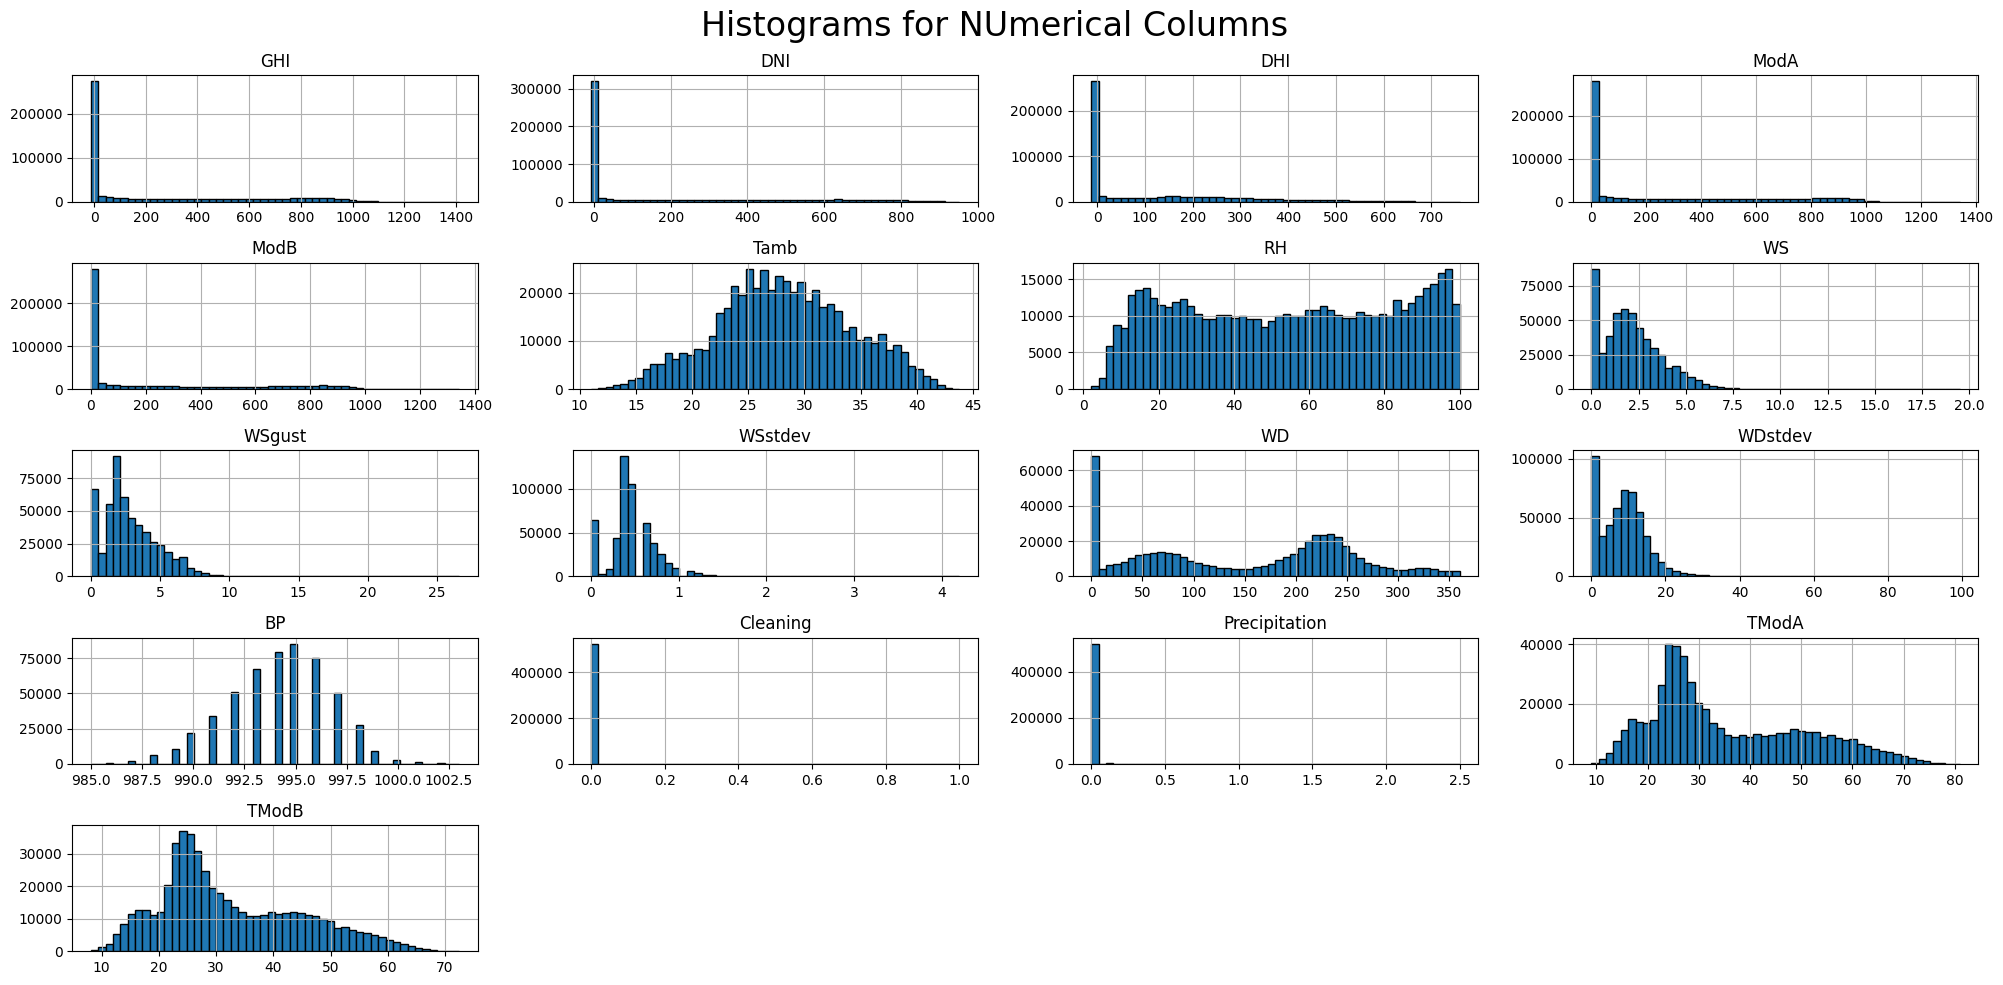

<Figure size 2000x1500 with 0 Axes>

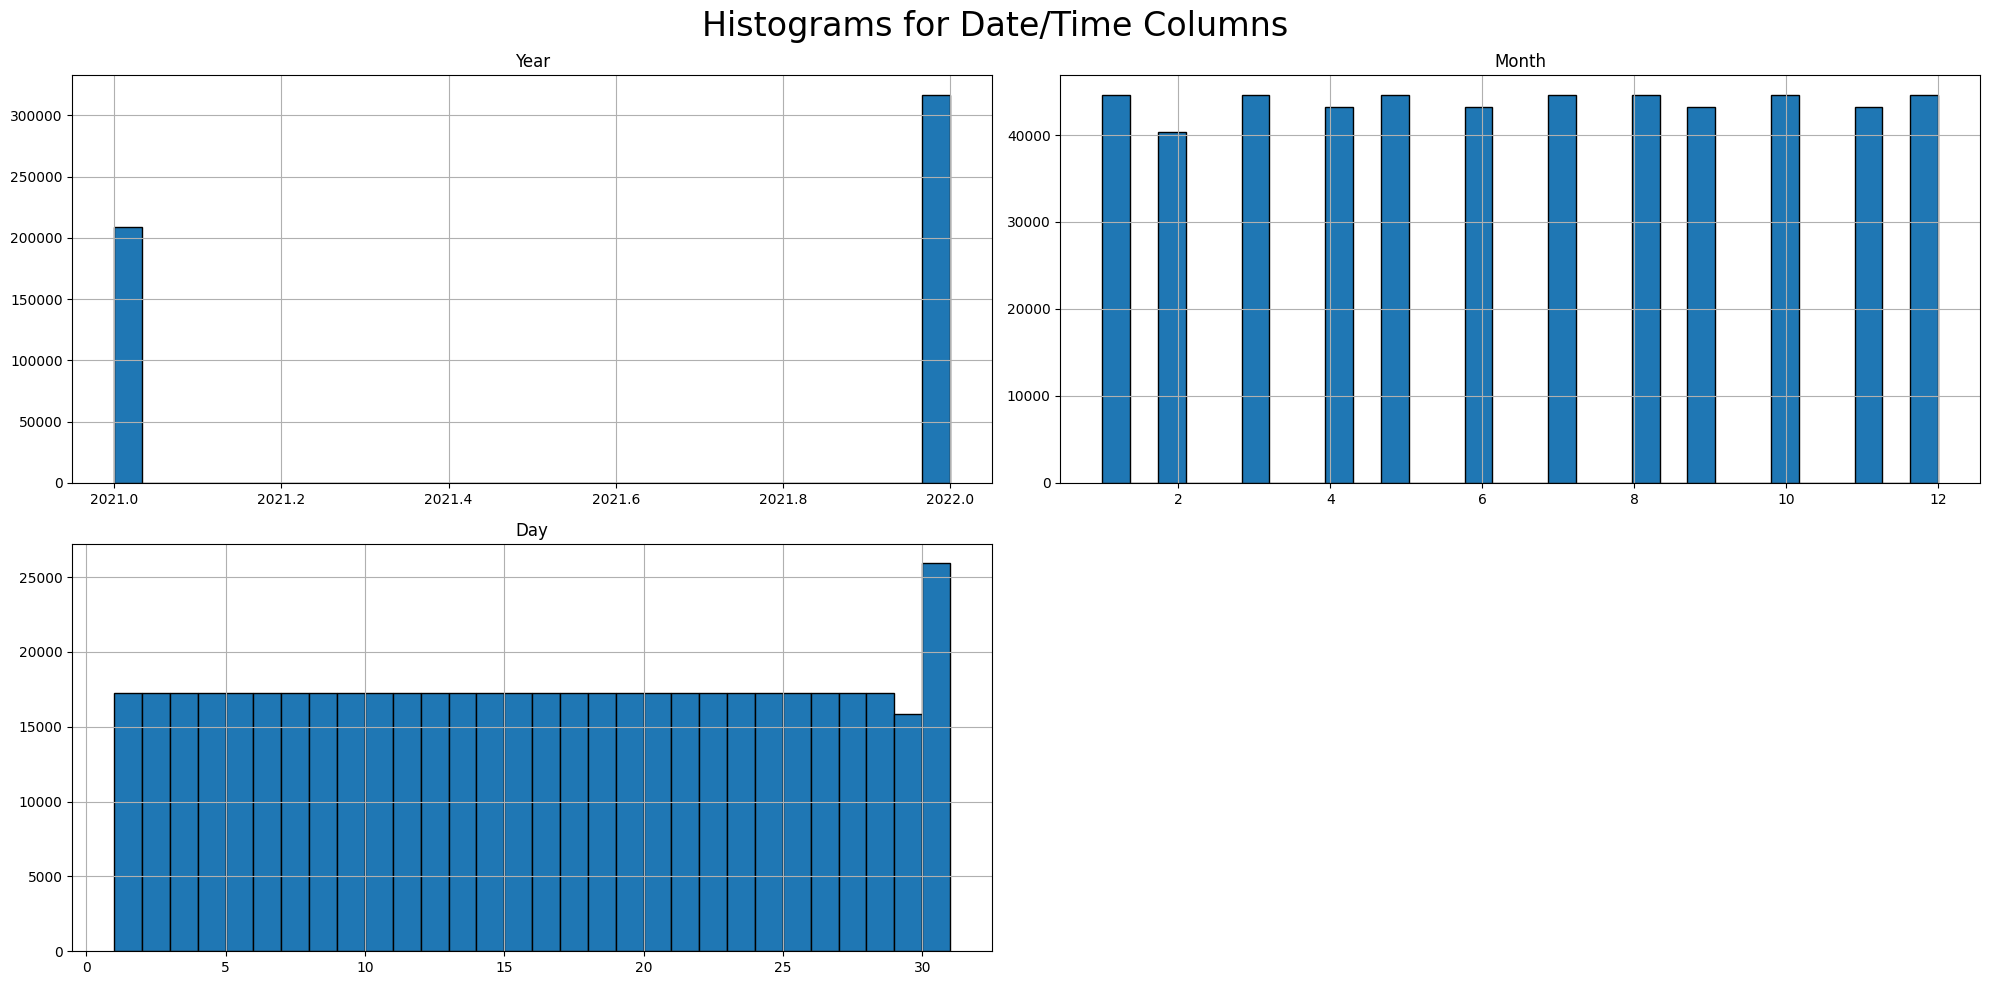

In [124]:
numerical_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
                     'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB']

datetime_columns = ['Date', 'Time', 'Year', 'Month', 'Day']



plt.figure(figsize=(20, 15))

benin[numerical_columns].hist(bins=50, figsize=(20, 10), edgecolor='black')
plt.suptitle('Histograms for NUmerical Columns', fontsize=24)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))
benin[datetime_columns].hist(bins=30, figsize=(20, 10), edgecolor='black')
plt.suptitle('Histograms for Date/Time Columns', fontsize=24)

plt.tight_layout()
plt.show()


From the histogram of the Numerical columns these observation is noticed

Highly Skewed Columns (Positive Skeweness)
    GHI, DNI, DHI, ModA, ModB, Cleaning, Precipitation : these columns are havily right-skeweed indicating most values are concentrated on the lower range with a long tail towards higher values.

Close to Normal Distribution
    Tamb and TModB : these columns exhibit a bell shaped curve, indicating a distribution closer to normal.The mea, median and mode are likely aligned.

Uniform or Bimodal Distribution
    RH : this column has a more uniform distribution across its range, without significan skeweness.

    WD: this column shows a bimodal distribution, with two peaks, suggesting specific patterns in wind direction

Other observations:
    WS, WSgust, WSstdev, and WDstdev : these columns have a moderate skew, leaning towards the right, with most values clustered at lower ranges but some spread to higher values.

    BP : this column appears symmetric and might be clost to normal but with slight peaks around specific pressure ranges.

<Figure size 2000x1500 with 0 Axes>

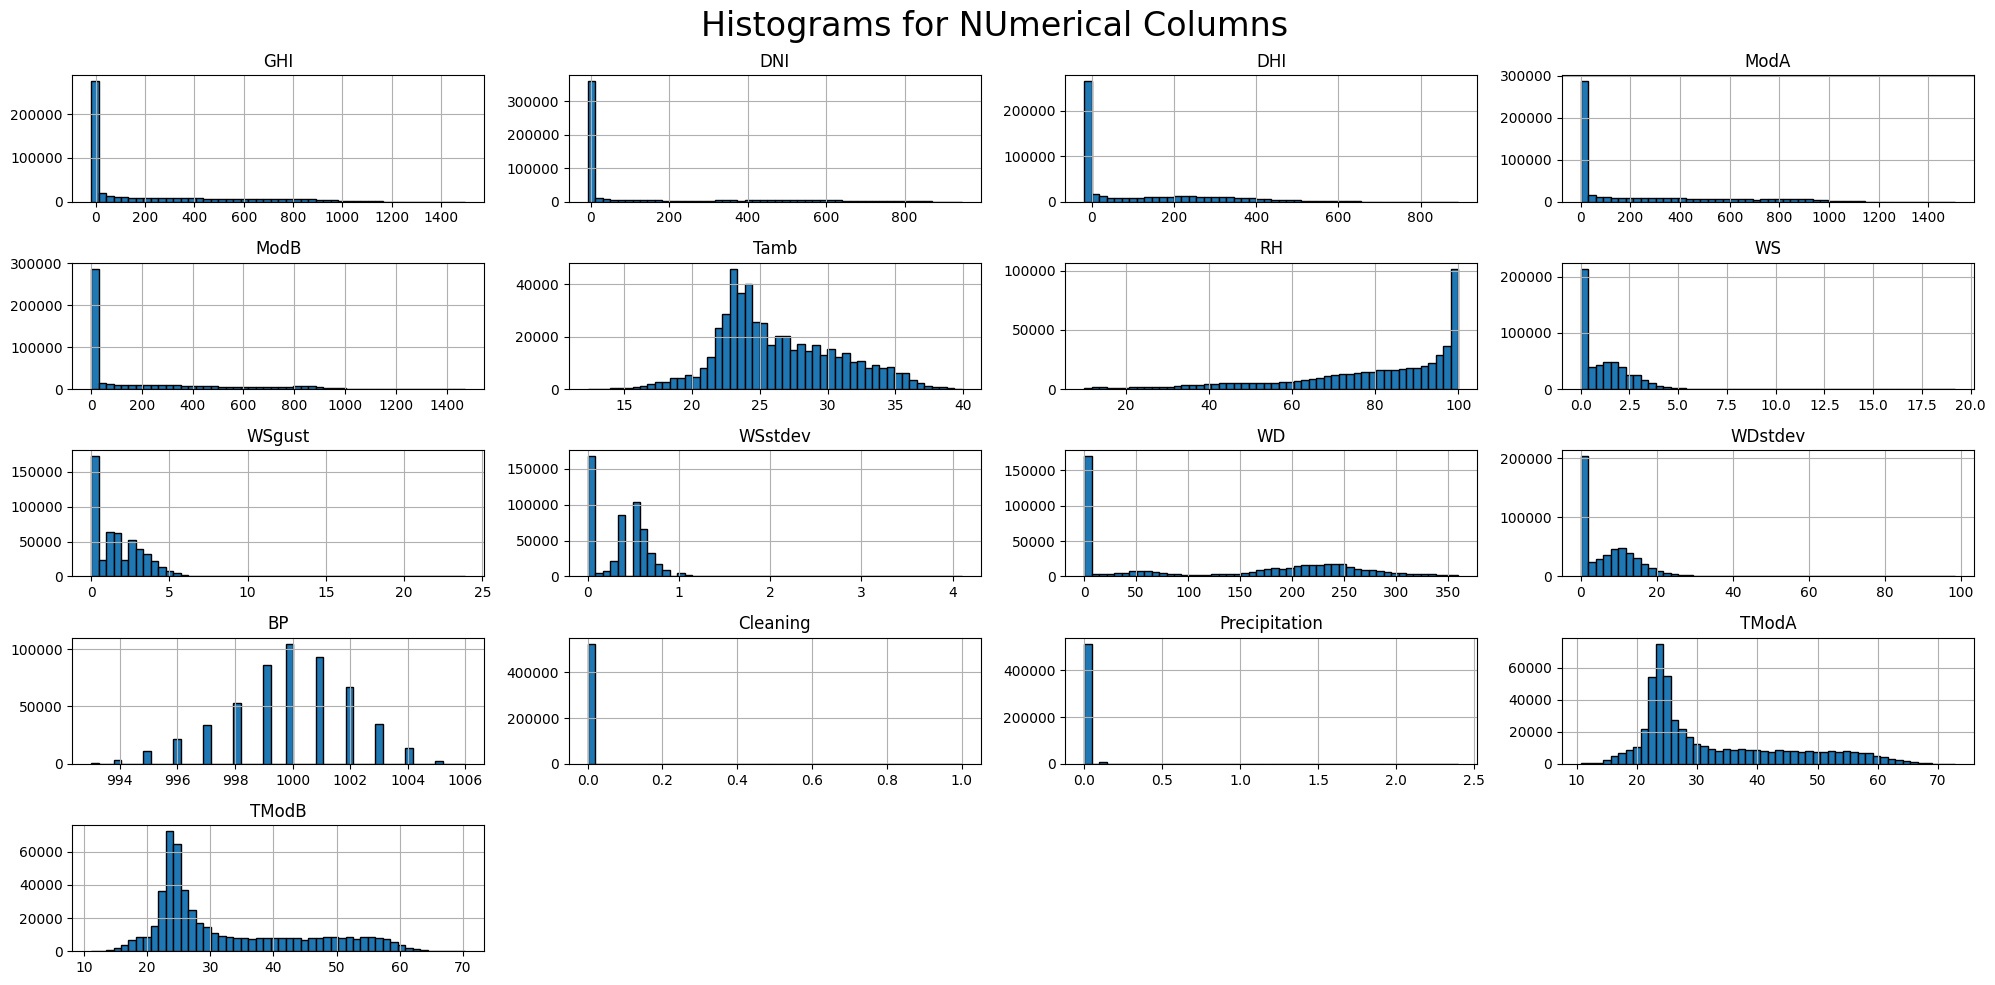

<Figure size 2000x1500 with 0 Axes>

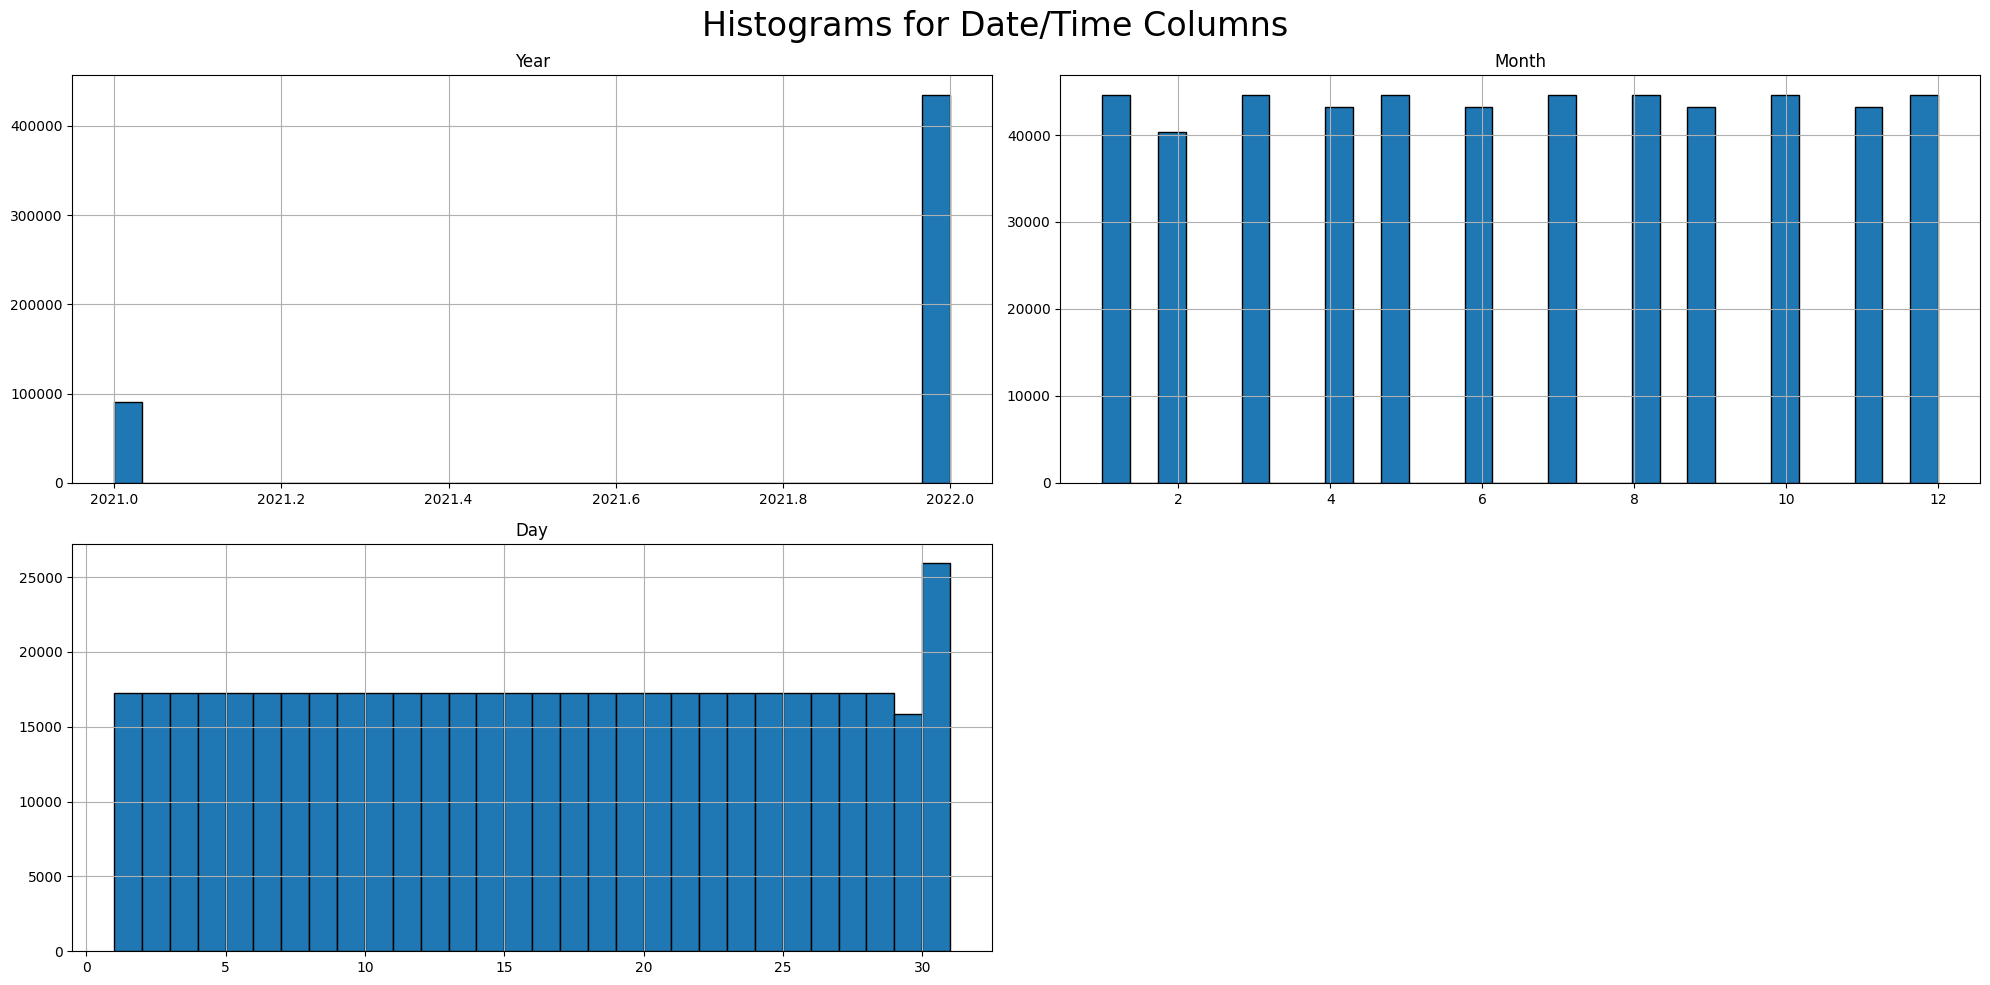

In [125]:
plt.figure(figsize=(20, 15))

sierraleone[numerical_columns].hist(bins=50, figsize=(20, 10), edgecolor='black')
plt.suptitle('Histograms for NUmerical Columns', fontsize=24)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))
sierraleone[datetime_columns].hist(bins=30, figsize=(20, 10), edgecolor='black')
plt.suptitle('Histograms for Date/Time Columns', fontsize=24)

plt.tight_layout()
plt.show()


GHI, DNI, DHI, ModA, ModB : these columns are positively skewed(right-skewed), with most of their values concentrated near zero and a long tail of higher values. They do not follow a noraml distribution.

Tamb and TModB: these columns are approximately symmetrical. Their bell-shaped curves suggest they are close to normal distribution though minor deviations might exist.


RH: This column is left-skewed with values clustering newar 100 and a tail towards lower values.It does not follow a noraml distribution.

WS, WSgust, WSstdev, and WDstdev : these columns are positively skewed with values clustered at the lower end and some extreme values creating a long gtail. They do not follow a normal distribution.

WD : This column appears bimodal with two distinct peaks suggesting two prevalent wind direction ranges.The distribution is not normal.

BP: Appears symmetrical though with distinct peaks, possibly due to seasonal or environmental factors. Close to normal but may have multimodal tendencies.

Cleaning and Precipitation : these columns are highly positively skewed with most values near zero and very few extreme values. They are far from normal.

TModA : this column is slightly positevly skewed with values tending towards higher numbers but still showing a somewhat symmetrical curve. It is clos to normal.



<Figure size 2000x1500 with 0 Axes>

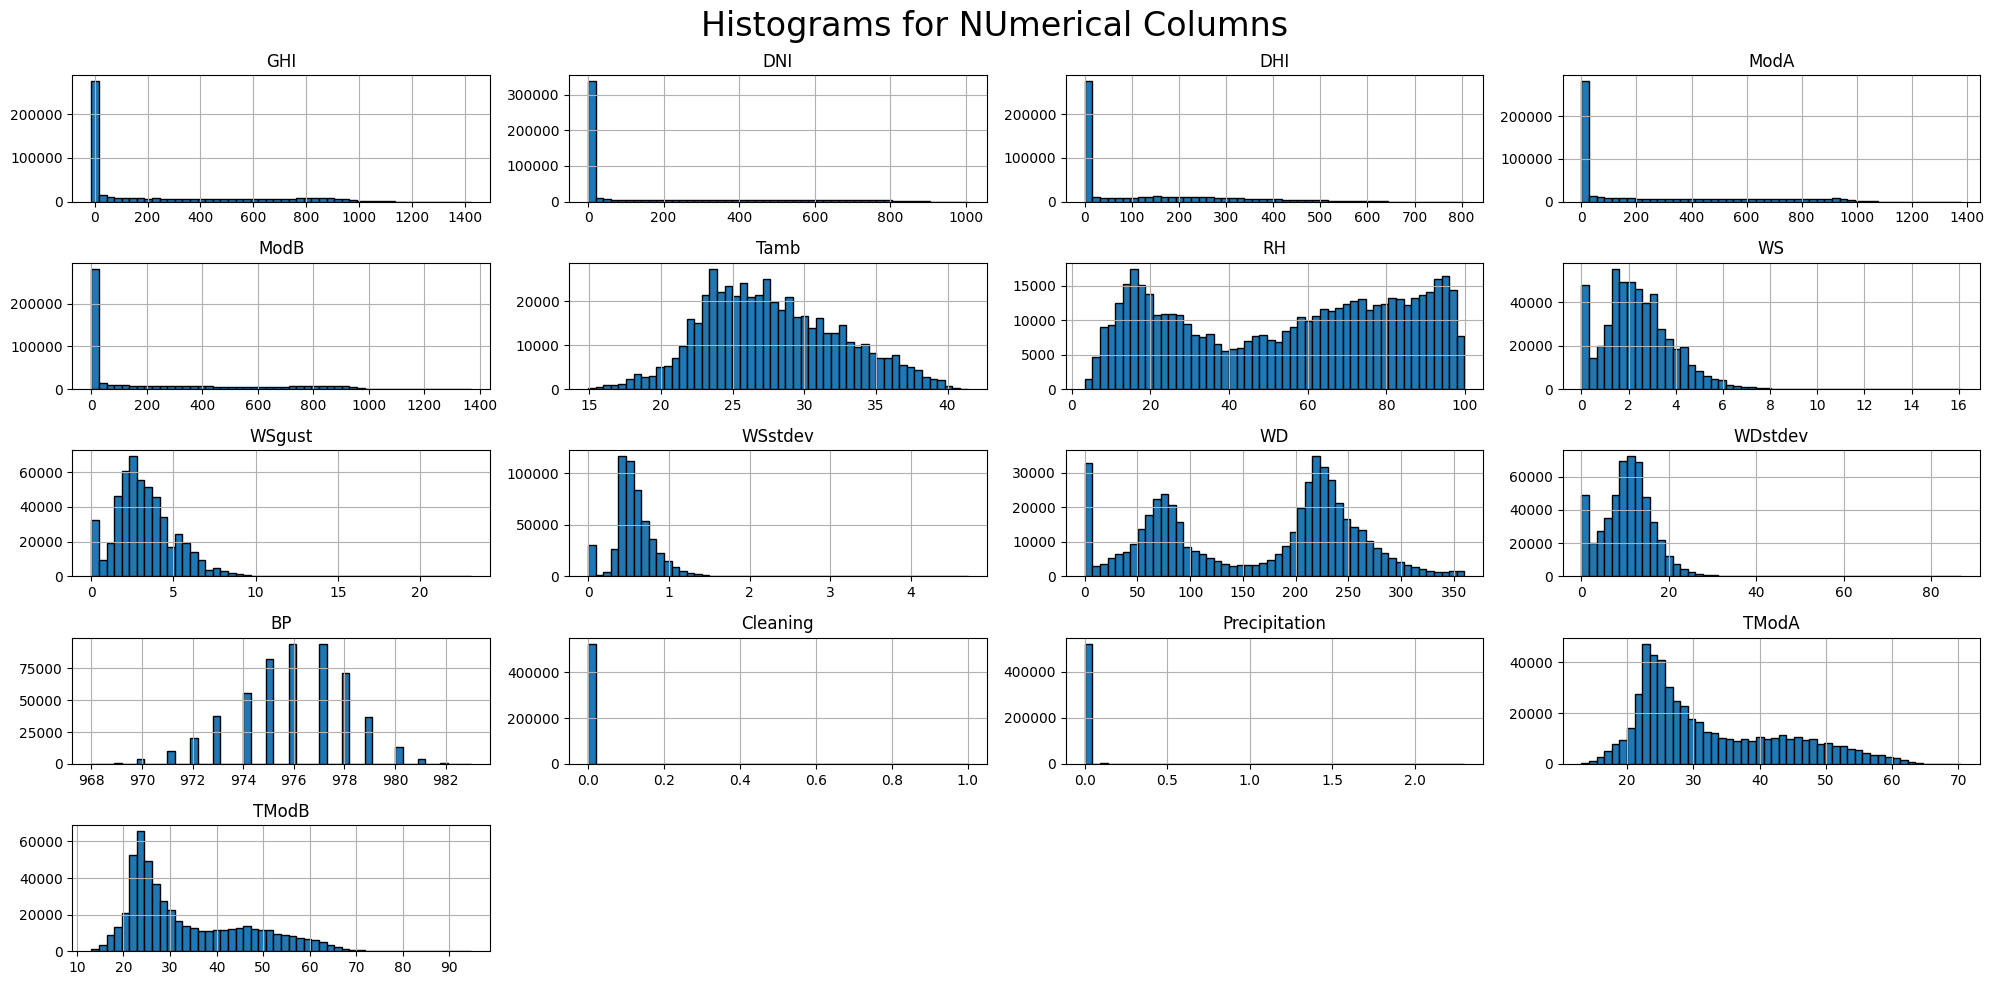

<Figure size 2000x1500 with 0 Axes>

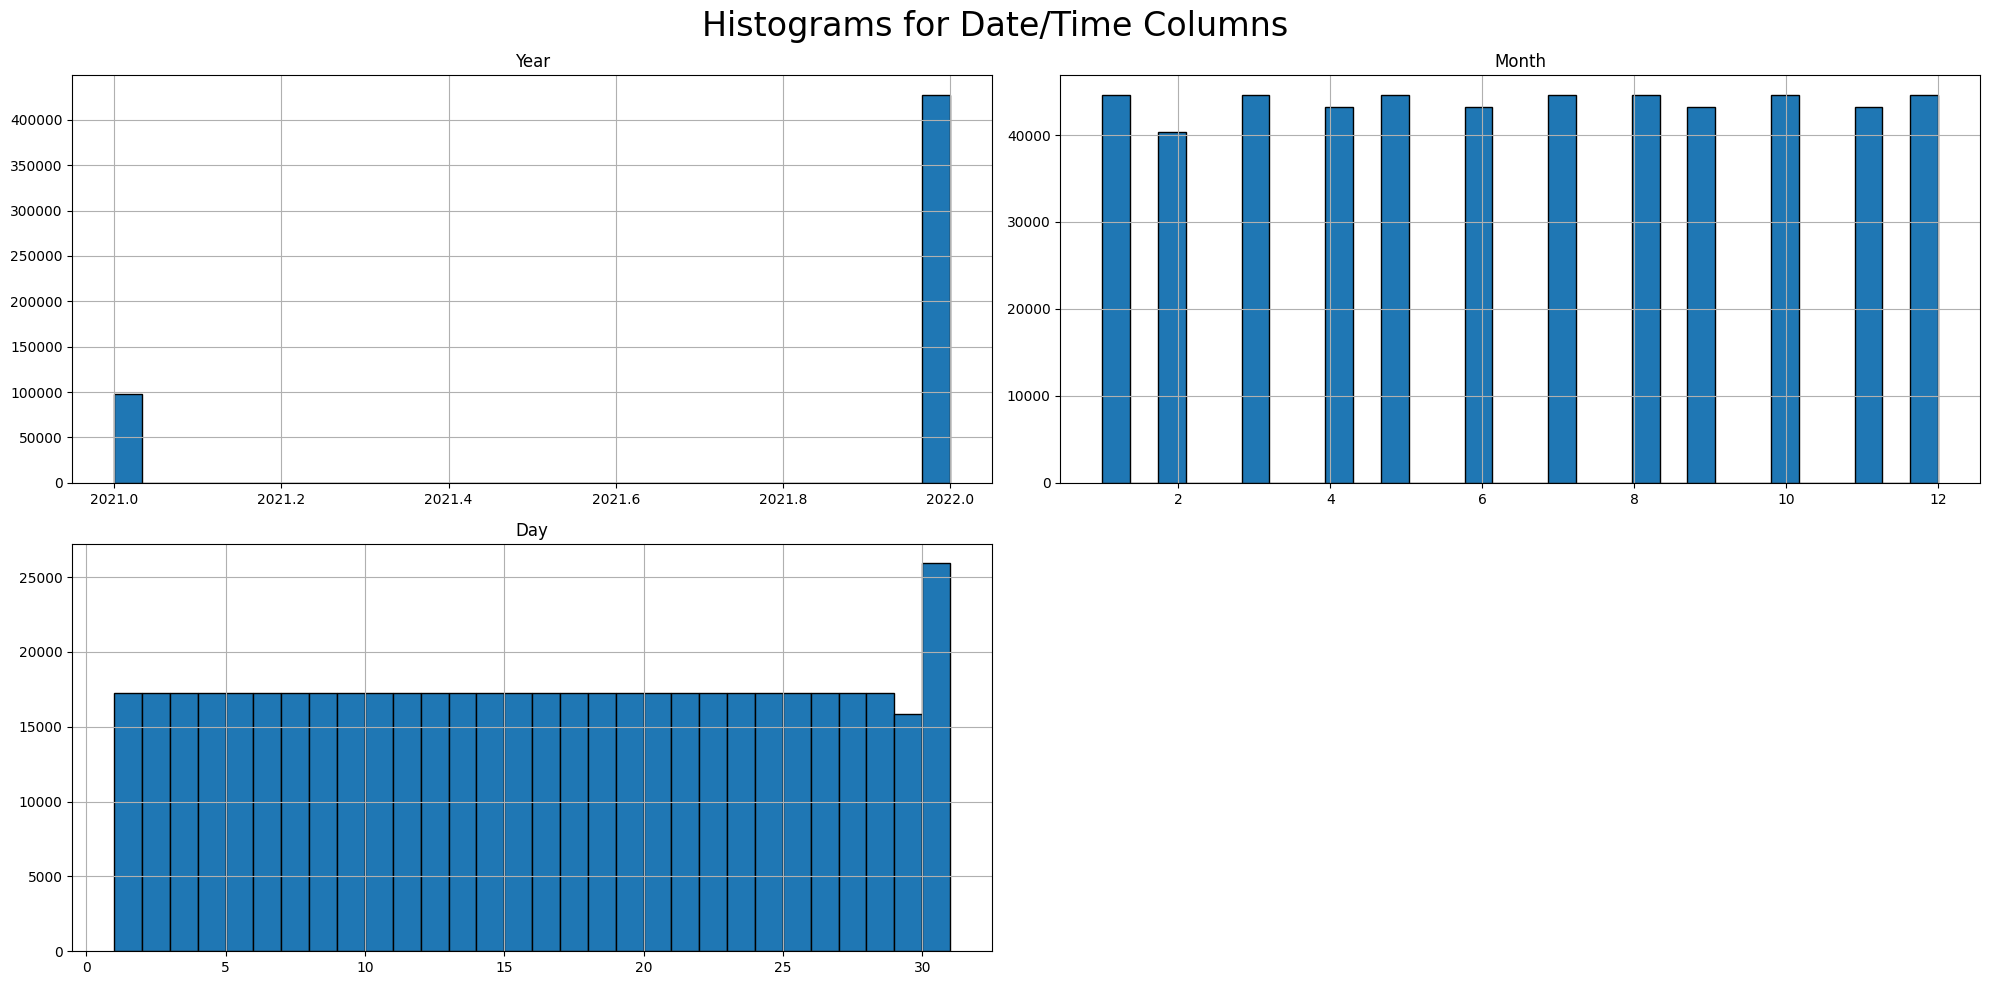

In [126]:
plt.figure(figsize=(20, 15))

togo[numerical_columns].hist(bins=50, figsize=(20, 10), edgecolor='black')
plt.suptitle('Histograms for NUmerical Columns', fontsize=24)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))
togo[datetime_columns].hist(bins=30, figsize=(20, 10), edgecolor='black')
plt.suptitle('Histograms for Date/Time Columns', fontsize=24)

plt.tight_layout()
plt.show()


GHI, DNI, DHI, ModA, ModB : these columns are positively skewed with a large concentration of values newar zero and a long tail extending to the right. Their distribution is far from normal.

Tamb : Appears symmetrical with values distributed around a central peak. Likely close to normal distribution.

RH: This column is left-skewed with values clustered near 100 and a long tail towards lower values. It does not follow a normal distribution.

WS, WSgust, WSstdev, WDstdev : these columns are positively skewed with most values near lower ranges and a few higher outliers.

WD: bimodal distribution with two peaks, likely due to two dominant wind directions.It is far from normal distribution.

BP: Appears symmetical with a well defined peak but may have multiple smaller peaks. Close to normal.

Cleaning and Precipitation : extremely postively skewed with most values  near zero and a few extreme outliers.Distributions are highly non-normal.

TModaA and TModB: slightly positively skewed with a bell like shape but a longer tail on the right. Distributions are closer to normal



Statistical method for confirming the data distribution whether it is Normally  distributed or not

Outliers Check for benin

Right Skwed columns -  GHI, DNI, DHI, ModA, ModB, Cleaning, Precipitation 

Using IQR method to identify outliers

In [141]:
skewed_col = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Cleaning', 'Precipitation']

for col in skewed_col:
    Q1 = benin[col].quantile(0.25)
    Q3 = benin[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = 0
    upper_bound = Q3 + 1.5 * IQR

    outliers = benin[(benin[col] < lower_bound) | (benin[col] > upper_bound)]
    print(f' { col } : { outliers.shape[0] }' )

    print(f'Lower bound is : {lower_bound} & Upper bound is { upper_bound}')
    

 GHI : 258992
Lower bound is : 0 & Upper bound is 1211.5
 DNI : 291183
Lower bound is : 0 & Upper bound is 786.25
 DHI : 267915
Lower bound is : 0 & Upper bound is 543.9000000000001
 ModA : 98
Lower bound is : 0 & Upper bound is 1159.25
 ModB : 240
Lower bound is : 0 & Upper bound is 1119.75
 Cleaning : 485
Lower bound is : 0 & Upper bound is 0.0
 Precipitation : 3789
Lower bound is : 0 & Upper bound is 0.0


Box plot

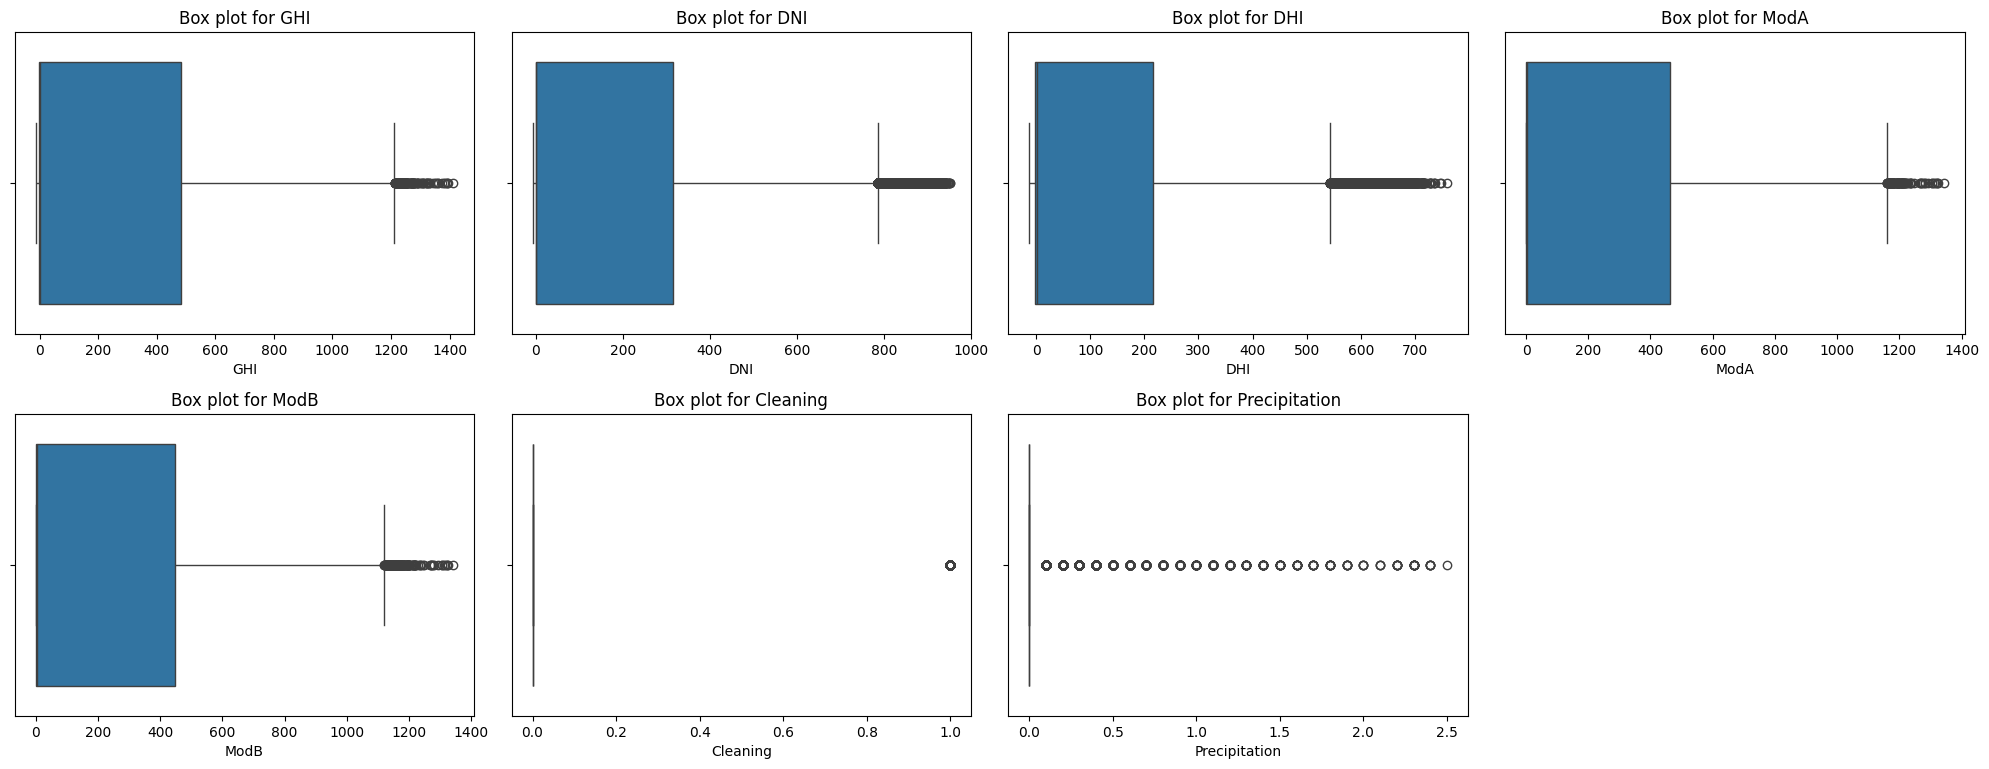

In [134]:
columns_to_plot = skewed_col


plt.figure(figsize=(20, 15))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=benin[column])
    plt.title(f'Box plot for { column }')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

close to normal distribution using z-score to detect outliers

In [143]:
normal_col = ['Tamb', 'TModB', 'BP']

for col in normal_col:
    mean = benin[col].mean()
    std_dev = benin[col].std()
    benin[f'{col}_z_score'] = (benin[col] - mean)/ std_dev


    outliers = benin[abs(benin[f'{col}_z_score']) > 3]

    print(f'Total outliers in { col } : { outliers.shape[0] }')


    print(f'Outliers in { col }')
    print(outliers)
    print()

Total outliers in Tamb : 0
Outliers in Tamb
Empty DataFrame
Columns: [Date, Time, Year, Month, Day, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB, Tamb_z_score, TModB_z_score, BP_z_score]
Index: []

[0 rows x 25 columns]

Total outliers in TModB : 98
Outliers in TModB
              Date      Time  Year  Month  Day     GHI    DNI    DHI    ModA  \
22318   2021-08-24  11:59:00  2021      8   24  1155.0  797.6  363.2  1107.0   
85713   2021-10-07  12:34:00  2021     10    7   967.0  589.3  389.0   969.0   
85714   2021-10-07  12:35:00  2021     10    7   968.0  587.5  391.4   968.0   
85715   2021-10-07  12:36:00  2021     10    7   970.0  584.8  395.6   970.0   
85716   2021-10-07  12:37:00  2021     10    7   975.0  585.3  400.2   975.0   
...            ...       ...   ...    ...  ...     ...    ...    ...     ...   
297483  2022-03-03  14:04:00  2022      3    3   902.0  589.9  346.0   905.0   
297484  2022-03-03  14:0

Outlier check for sierraleone

In [155]:
skewed_col = ['GHI', 'DNI', 'ModA', 'ModB', 'Cleaning', 'Precipitation']

for col in skewed_col:
    Q1 = sierraleone[col].quantile(0.25)
    Q3 = sierraleone[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = 0
    upper_bound = Q3 + 1.5 * IQR

    outliers = sierraleone[(sierraleone[col] < lower_bound) | (sierraleone[col] > upper_bound)]
    print(f' { col } : { outliers.shape[0] }' )

    print(f'Lower bound is : {lower_bound} & Upper bound is { upper_bound}')


    print(outliers)
    

 GHI : 276988
Lower bound is : 0 & Upper bound is 910.1999999999999
              Date      Time  Year  Month  Day  GHI  DNI  DHI  ModA  ModB  \
0       2021-10-30  00:01:00  2021     10   30 -0.7 -0.1 -0.8   0.0   0.0   
1       2021-10-30  00:02:00  2021     10   30 -0.7 -0.1 -0.8   0.0   0.0   
2       2021-10-30  00:03:00  2021     10   30 -0.7 -0.1 -0.8   0.0   0.0   
3       2021-10-30  00:04:00  2021     10   30 -0.7  0.0 -0.8   0.0   0.0   
4       2021-10-30  00:05:00  2021     10   30 -0.7 -0.1 -0.8   0.0   0.0   
...            ...       ...   ...    ...  ...  ...  ...  ...   ...   ...   
525595  2022-10-29  23:56:00  2022     10   29 -1.6 -0.1 -2.9   0.0   0.0   
525596  2022-10-29  23:57:00  2022     10   29 -1.7 -0.1 -3.0   0.0   0.0   
525597  2022-10-29  23:58:00  2022     10   29 -1.7 -0.1 -3.1   0.0   0.0   
525598  2022-10-29  23:59:00  2022     10   29 -1.7 -0.2 -3.3   0.0   0.0   
525599  2022-10-30  00:00:00  2022     10   30 -1.7 -0.1 -3.4   0.0   0.0   

       

Box plot

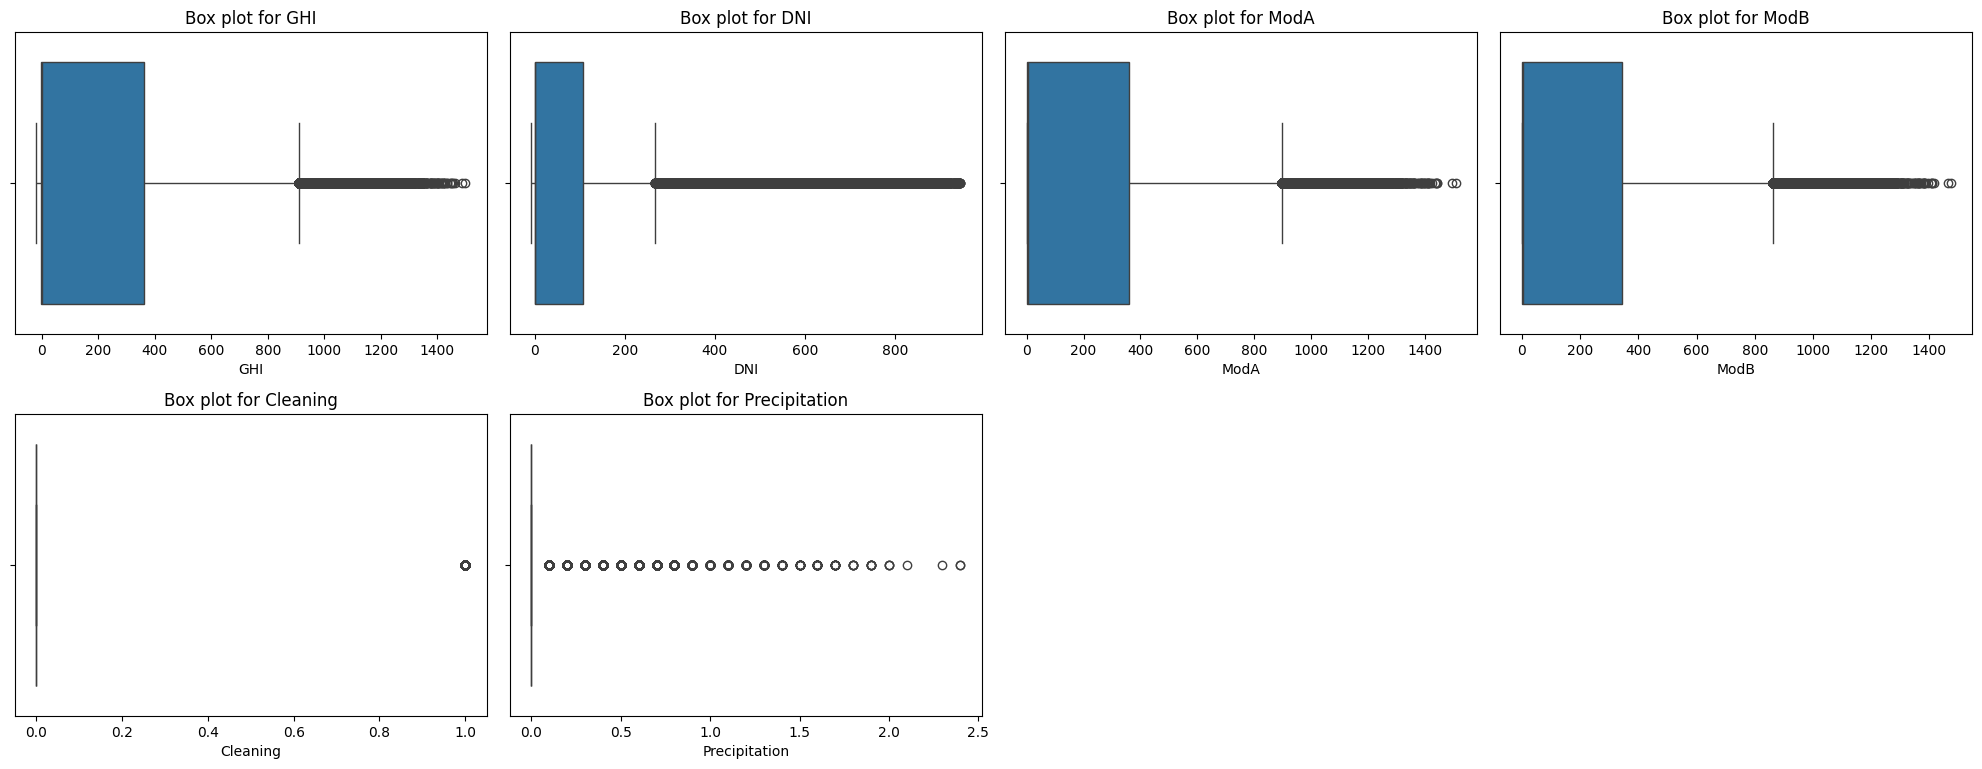

In [147]:
columns_to_plot = skewed_col


plt.figure(figsize=(20, 15))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=sierraleone[column])
    plt.title(f'Box plot for { column }')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

close to normal distribution using z-score to detect outliers

In [149]:
normal_col = ['Tamb', 'TModB', 'BP', 'TModA']

for col in normal_col:
    mean = sierraleone[col].mean()
    std_dev = sierraleone[col].std()
    sierraleone[f'{col}_z_score'] = (sierraleone[col] - mean)/ std_dev


    outliers = sierraleone[abs(sierraleone[f'{col}_z_score']) > 3]

    print(f'Total outliers in { col } : { outliers.shape[0] }')


    print(f'Outliers in { col }')
    print(outliers)
    print('\n')

Total outliers in Tamb : 192
Outliers in Tamb
              Date      Time  Year  Month  Day    GHI    DNI    DHI   ModA  \
121314  2022-01-22  05:55:00  2022      1   22  -11.6   -0.6  -11.6    0.0   
121315  2022-01-22  05:56:00  2022      1   22  -11.9   -0.6  -11.9    0.0   
121316  2022-01-22  05:57:00  2022      1   22  -12.1   -0.6  -12.1    0.0   
121317  2022-01-22  05:58:00  2022      1   22  -12.1   -0.6  -12.2    0.0   
121318  2022-01-22  05:59:00  2022      1   22  -12.0   -0.6  -12.1    0.0   
...            ...       ...   ...    ...  ...    ...    ...    ...    ...   
156477  2022-02-15  15:58:00  2022      2   15  379.4  271.0  202.1  387.7   
186660  2022-03-08  15:01:00  2022      3    8  718.5  449.5  344.0  734.0   
186661  2022-03-08  15:02:00  2022      3    8  726.3  457.0  347.0  741.5   
186662  2022-03-08  15:03:00  2022      3    8  732.0  461.2  350.3  746.1   
186663  2022-03-08  15:04:00  2022      3    8  734.3  464.2  351.7  748.3   

         ModB  ..

Outlier check for togo

In [154]:
skewed_col = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Cleaning', 'Precipitation']

for col in skewed_col:
    Q1 = togo[col].quantile(0.25)
    Q3 = togo[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = 0
    upper_bound = Q3 + 1.5 * IQR

    outliers = togo[(togo[col] < lower_bound) | (togo[col] > upper_bound)]
    print(f' { col } : { outliers.shape[0] }' )


    print(f'Lower bound is : {lower_bound} & Upper bound is { upper_bound}')


    print(outliers)
    

 GHI : 258688
Lower bound is : 0 & Upper bound is 1109.3
              Date      Time  Year  Month  Day  GHI  DNI  DHI  ModA  ModB  \
0       2021-10-25  00:01:00  2021     10   25 -1.3  0.0  0.0   0.0   0.0   
1       2021-10-25  00:02:00  2021     10   25 -1.3  0.0  0.0   0.0   0.0   
2       2021-10-25  00:03:00  2021     10   25 -1.3  0.0  0.0   0.0   0.0   
3       2021-10-25  00:04:00  2021     10   25 -1.2  0.0  0.0   0.0   0.0   
4       2021-10-25  00:05:00  2021     10   25 -1.2  0.0  0.0   0.0   0.0   
...            ...       ...   ...    ...  ...  ...  ...  ...   ...   ...   
525595  2022-10-24  23:56:00  2022     10   24 -0.8  0.0  0.0   0.0   0.0   
525596  2022-10-24  23:57:00  2022     10   24 -0.9  0.0  0.0   0.0   0.0   
525597  2022-10-24  23:58:00  2022     10   24 -1.0  0.0  0.0   0.0   0.0   
525598  2022-10-24  23:59:00  2022     10   24 -1.1  0.0  0.0   0.0   0.0   
525599  2022-10-25  00:00:00  2022     10   25 -1.2  0.0  0.0   0.0   0.0   

        ...  WDstd

Box plot

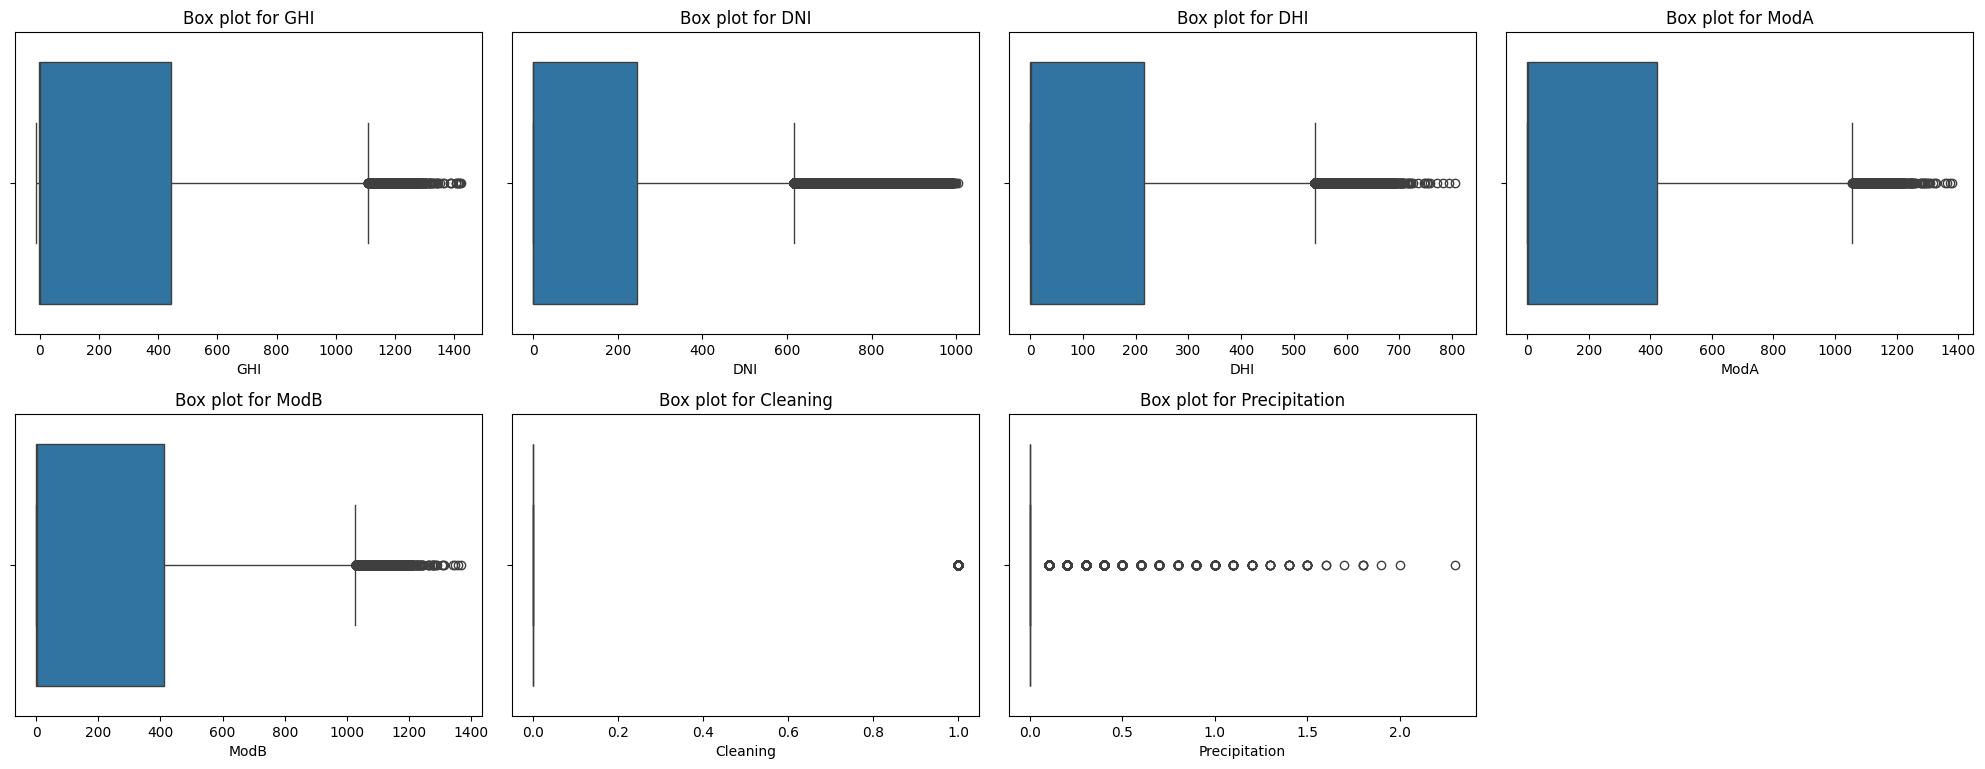

In [152]:
columns_to_plot = skewed_col


plt.figure(figsize=(20, 15))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=togo[column])
    plt.title(f'Box plot for { column }')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

close to normal distribution using z-score to detect outliers

In [153]:
normal_col = ['Tamb', 'BP', 'TModA' , 'TModB' ]

for col in normal_col:
    mean = togo[col].mean()
    std_dev = togo[col].std()
    togo[f'{col}_z_score'] = (togo[col] - mean)/ std_dev


    outliers = togo[abs(togo[f'{col}_z_score']) > 3]

    print(f'Total outliers in { col } : { outliers.shape[0] }')


    print(f'Outliers in { col }')
    print(outliers)
    print('\n')

Total outliers in Tamb : 0
Outliers in Tamb
Empty DataFrame
Columns: [Date, Time, Year, Month, Day, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB, Tamb_z_score]
Index: []

[0 rows x 23 columns]


Total outliers in BP : 1019
Outliers in BP
              Date      Time  Year  Month  Day    GHI    DNI    DHI   ModA  \
122893  2022-01-18  08:14:00  2022      1   18  349.2  468.6  149.6  381.0   
122900  2022-01-18  08:21:00  2022      1   18  373.5  483.4  156.0  407.7   
122901  2022-01-18  08:22:00  2022      1   18  378.8  490.9  156.4  413.4   
122903  2022-01-18  08:24:00  2022      1   18  387.8  499.3  158.1  423.2   
122904  2022-01-18  08:25:00  2022      1   18  391.4  501.1  159.1  427.0   
...            ...       ...   ...    ...  ...    ...    ...    ...    ...   
245871  2022-04-13  17:52:00  2022      4   13   28.9    0.0   29.1   26.4   
245872  2022-04-13  17:53:00  2022      4   13   27.2    0.0   27.3   